# PenguinDemo: Exploratory Data Analysis 🐧

Welcome to the Compute42 demo project! This notebook demonstrates **common exploratory data analysis (EDA) steps** using the Palmer Penguins dataset.

## What You'll Explore
- Loading and inspecting data
- Summary statistics and missing values
- Visualizations (scatter plots, histograms, box plots)
- Correlation analysis
- Group comparisons by species and island

## Dataset
We use the [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins) (CC0), a fun alternative to the classic Iris dataset.

## 1. Setup and Imports

In [ ]:
using DataFrames, CSV, Plots, Statistics, StatsPlots

# Set random seed for reproducibility (if using random operations)
using Random
Random.seed!(42)

# Include utility modules
include("src/data_loading.jl")
include("src/utils.jl")

get_predictions (generic function with 1 method)


## 2. Load the Dataset

In [ ]:
# Load the dataset using the shared function
df = load_penguin_data()
# Display dataset information
println("\nDataset shape: $(size(df, 1)) rows × $(size(df, 2)) columns")
println("\nColumns: $(names(df))")
println("\nMissing values per column:")
for col in names(df)
    missing_count = count(ismissing, df[!, col])
    if missing_count > 0
        println("  $col: $missing_count ($(round(missing_count/size(df,1)*100, digits=1))%)")
    end
end

Loaded 344 penguin records from Palmer Station LTER!

Dataset shape: 344 rows × 8 columns

Columns: ["species", "island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex", "year"]

Missing values per column:
  bill_length_mm: 2 (0.6%)
  bill_depth_mm: 2 (0.6%)
  flipper_length_mm: 2 (0.6%)
  body_mass_g: 2 (0.6%)
  sex: 11 (3.2%)


## 3. Summary Statistics


In [ ]:
# Get summary statistics for numeric columns
numeric_cols = [:bill_length_mm, :bill_depth_mm, :flipper_length_mm, :body_mass_g]
df_clean = dropmissing(df, numeric_cols)

println("Summary Statistics for Numeric Variables:")
println("="^60)
for col in numeric_cols
    values = df_clean[!, col]
    println("\n$col:")
    println("  Count:    $(length(values))")
    println("  Mean:     $(round(mean(values), digits=2))")
    println("  Std Dev:  $(round(std(values), digits=2))")
    println("  Min:      $(minimum(values))")
    println("  Median:   $(round(median(values), digits=2))")
    println("  Max:      $(maximum(values))")
end


Summary Statistics for Numeric Variables:

bill_length_mm:
  Count:    342
  Mean:     43.92
  Std Dev:  5.46
  Min:      32.1
  Median:   44.45
  Max:      59.6

bill_depth_mm:
  Count:    342
  Mean:     17.15
  Std Dev:  1.97
  Min:      13.1
  Median:   17.3
  Max:      21.5

flipper_length_mm:
  Count:    342
  Mean:     200.92
  Std Dev:  14.06
  Min:      172
  Median:   197.0
  Max:      231

body_mass_g:
  Count:    342
  Mean:     4201.75
  Std Dev:  801.95
  Min:      2700
  Median:   4050.0
  Max:      6300


In [ ]:
# Summary statistics by species
df_species = dropmissing(df, [:species, numeric_cols...])
println("\nSummary Statistics by Species:")
println("="^60)
species_stats = combine(groupby(df_species, :species), 
    :body_mass_g => mean => :mean_mass,
    :body_mass_g => std => :std_mass,
    :bill_length_mm => mean => :mean_bill_length,
    :flipper_length_mm => mean => :mean_flipper_length,
    nrow => :count
)
println(species_stats)



Summary Statistics by Species:
3×6 DataFrame
 Row │ species    mean_mass  std_mass  mean_bill_length  mean_flipper_length  count
     │ String15   Float64    Float64   Float64           Float64              Int64
─────┼──────────────────────────────────────────────────────────────────────────────
   1 │ Adelie       3700.66   458.566           38.7914              189.954    151
   2 │ Gentoo       5076.02   504.116           47.5049              217.187    123
   3 │ Chinstrap    3733.09   384.335           48.8338              195.824     68


## 4. Visualizations

### 4.1 Correlation Analysis

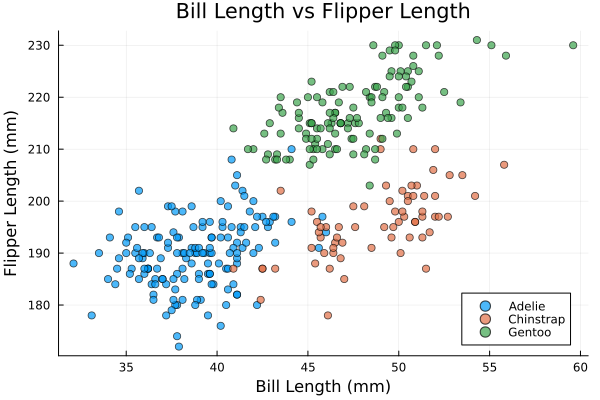

In [ ]:
# Scatter plots showing key relationships, colored by species
df_viz = dropmissing(df, [:species, :bill_length_mm, :flipper_length_mm, :body_mass_g])

# Bill length vs Flipper length
scatter(df_viz.bill_length_mm, df_viz.flipper_length_mm,
    group=df_viz.species,
    title="Bill Length vs Flipper Length",
    xlabel="Bill Length (mm)",
    ylabel="Flipper Length (mm)",
    legend=:bottomright,
    markersize=4,
    alpha=0.7
)


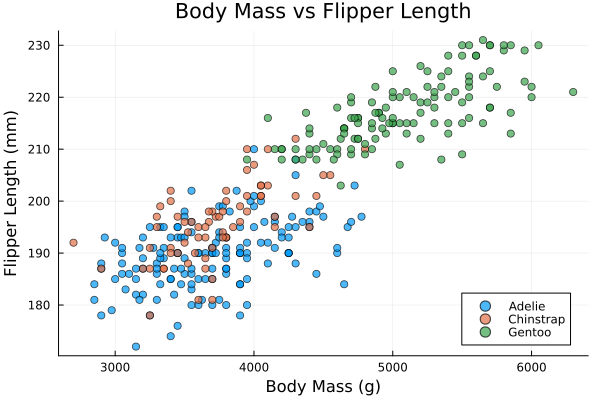

In [ ]:
# Body mass vs Flipper length
scatter(df_viz.body_mass_g, df_viz.flipper_length_mm,
    group=df_viz.species,
    title="Body Mass vs Flipper Length",
    xlabel="Body Mass (g)",
    ylabel="Flipper Length (mm)",
    legend=:bottomright,
    markersize=4,
    alpha=0.7
)


### 4.2 Distribution Comparisons

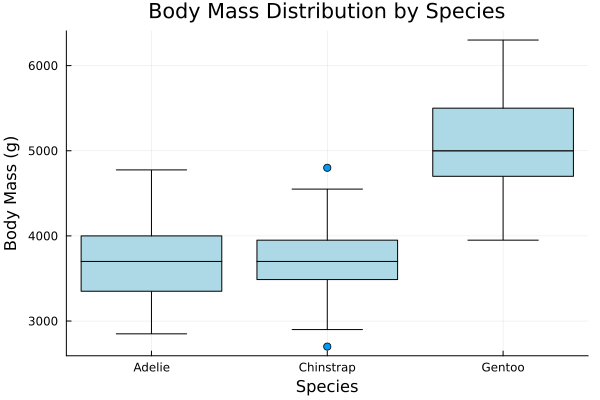

In [ ]:
# Box plots show distribution and summary statistics by species
df_species_viz = dropmissing(df, [:species, :body_mass_g])

# Body mass by species
boxplot(df_species_viz.species, df_species_viz.body_mass_g,
    title="Body Mass Distribution by Species",
    xlabel="Species",
    ylabel="Body Mass (g)",
    legend=false,
    fillcolor=:lightblue
)

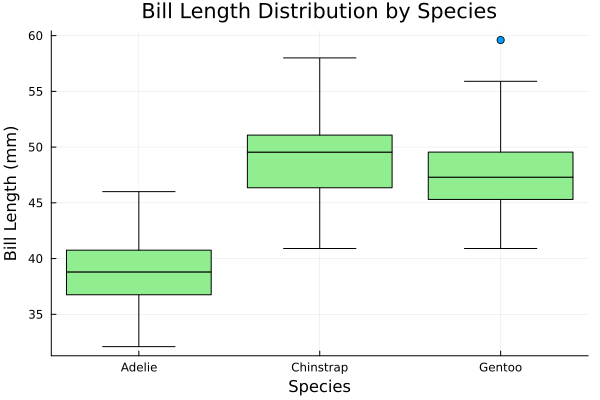

In [ ]:
# Bill length by species
df_bill = dropmissing(df, [:species, :bill_length_mm])
boxplot(df_bill.species, df_bill.bill_length_mm,
    title="Bill Length Distribution by Species",
    xlabel="Species",
    ylabel="Bill Length (mm)",
    legend=false,
    fillcolor=:lightgreen
)

## 5. Histograms

### 5.1 Distribution of Measurements

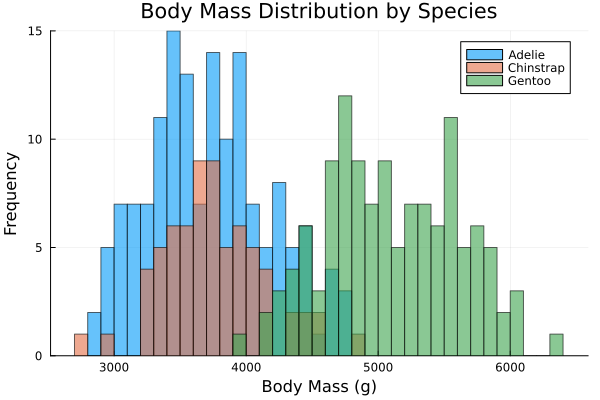

In [ ]:
# Histograms by species (overlaid)
histogram(df_viz.body_mass_g, group=df_viz.species,
    title="Body Mass Distribution by Species",
    xlabel="Body Mass (g)",
    ylabel="Frequency",
    bins=25,
    alpha=0.6,
    legend=:topright
)